<a href="https://colab.research.google.com/github/nikhilScripts/Generative-Adversarial-Networks/blob/main/GAN_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## GAN intro

***Importing libraries***

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import time
import random

In [2]:
import torchvision
import torchvision.transforms as transforms
from torchvision import datasets
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader

In [22]:
os.makedirs('./images/gan',exist_ok = True)

Hyperparameters

In [4]:
batch_size = 64
n_epochs = 100
image_size = 28*28  # 28*28 = 784
latent_dim = 100  # define complexity
print_every = 5
n_show = 5

In [5]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [6]:
transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,),(0.5,))
    ])

In [7]:
data = datasets.MNIST('.data', train = True, download = True, transform = transforms)

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9.91M/9.91M [00:00<00:00, 56.7MB/s]


Extracting .data/MNIST/raw/train-images-idx3-ubyte.gz to .data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28.9k/28.9k [00:00<00:00, 1.94MB/s]


Extracting .data/MNIST/raw/train-labels-idx1-ubyte.gz to .data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1.65M/1.65M [00:00<00:00, 14.8MB/s]


Extracting .data/MNIST/raw/t10k-images-idx3-ubyte.gz to .data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4.54k/4.54k [00:00<00:00, 9.50MB/s]

Extracting .data/MNIST/raw/t10k-labels-idx1-ubyte.gz to .data/MNIST/raw



In [8]:
data

Dataset MNIST
    Number of datapoints: 60000
    Root location: .data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5,), std=(0.5,))
           )

In [9]:
iterator = DataLoader(data, batch_size = batch_size, drop_last = True)

Generator

In [10]:

class Generator(nn.Module):
    def __init__(self, latent_dim, image_size):
        super().__init__()

        self.main = nn.Sequential(

            nn.Linear(latent_dim, 256),
            nn.LeakyReLU(0.2),

            nn.Linear(256, 512),
            nn.LeakyReLU(0.2),

            nn.Linear(512, 1024),
            nn.LeakyReLU(0.2),

            nn.Linear(1024, image_size),
            nn.Tanh(),

        )

    def forward(self, x):
        return self.main(x)

Discriminator

In [11]:
class Discriminator(nn.Module):
    def __init__(self, image_size):
        super().__init__()

        self.main = nn.Sequential(

            nn.Linear(image_size, 1024),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),

            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),

            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),

            nn.Linear(256, 1),
            nn.Sigmoid(),

        )

    def forward(self, x):
        return self.main(x).squeeze(1)

In [12]:
G = Generator(latent_dim, image_size).to(device)

In [13]:
D = Discriminator(image_size).to(device)

In [14]:
# loss
criterion = nn.BCELoss()

In [15]:
#  Optimizer
G_optimizer = optim.Adam(G.parameters(), lr=0.0002, betas=(0.5, 0.999))
D_optimizer = optim.Adam(D.parameters(), lr=0.0002, betas=(0.5, 0.999))

In [16]:
#labels
real_labels = torch.ones(batch_size,).to(device)
fake_labels = torch.zeros(batch_size,).to(device)

In [17]:
# function time
def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

*Training loop*

| Epoch: 005 | D_error: 0.371 | G_error: 1.967 | Time: 0m 33s


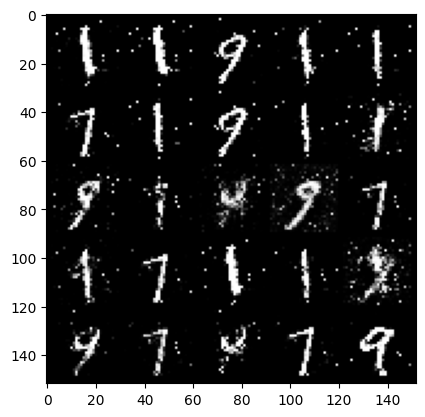

| Epoch: 010 | D_error: 0.445 | G_error: 2.344 | Time: 0m 33s


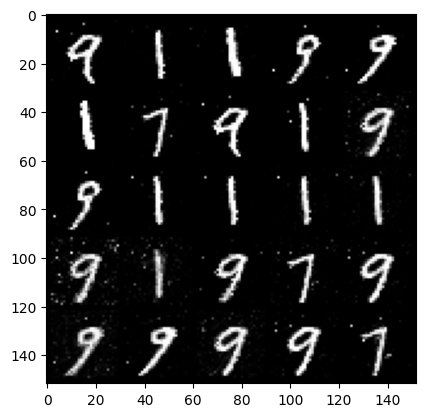

| Epoch: 015 | D_error: 0.442 | G_error: 2.286 | Time: 0m 33s


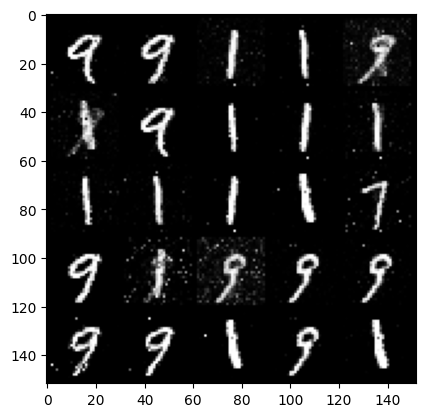

| Epoch: 020 | D_error: 0.406 | G_error: 2.631 | Time: 0m 32s


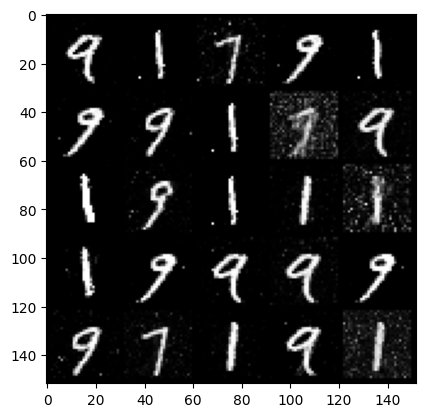

| Epoch: 025 | D_error: 0.377 | G_error: 2.338 | Time: 0m 32s


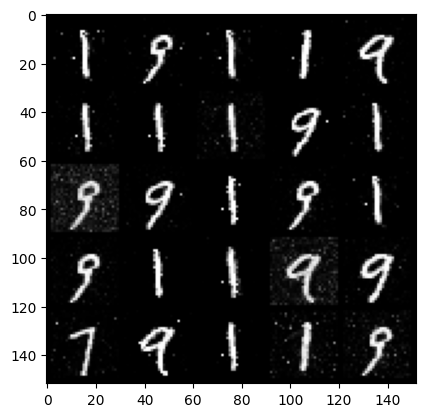

| Epoch: 030 | D_error: 0.435 | G_error: 2.524 | Time: 0m 32s


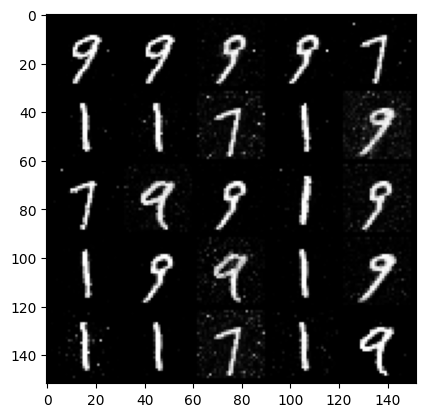

| Epoch: 035 | D_error: 0.398 | G_error: 2.226 | Time: 0m 33s


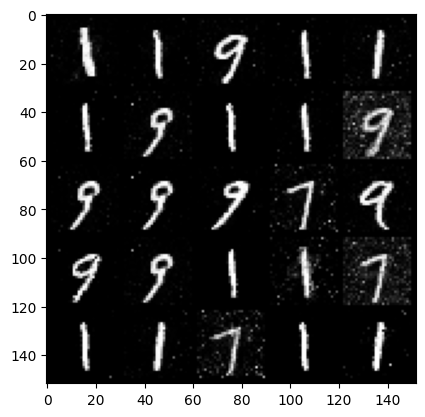

| Epoch: 040 | D_error: 0.407 | G_error: 2.845 | Time: 0m 33s


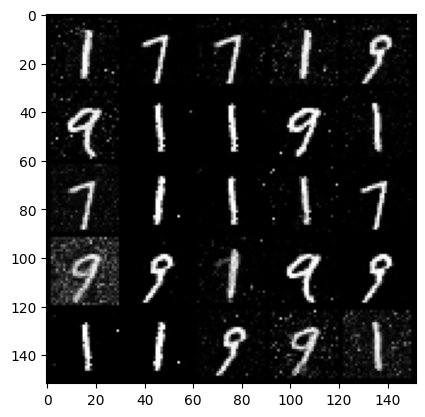

| Epoch: 045 | D_error: 0.419 | G_error: 2.686 | Time: 0m 32s


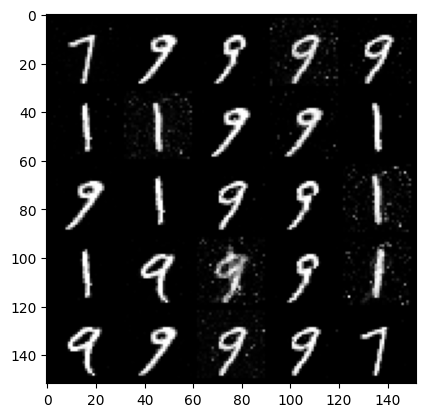

| Epoch: 050 | D_error: 0.433 | G_error: 2.455 | Time: 0m 32s


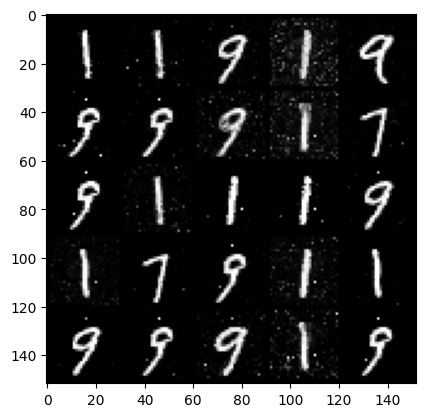

| Epoch: 055 | D_error: 0.350 | G_error: 3.061 | Time: 0m 31s


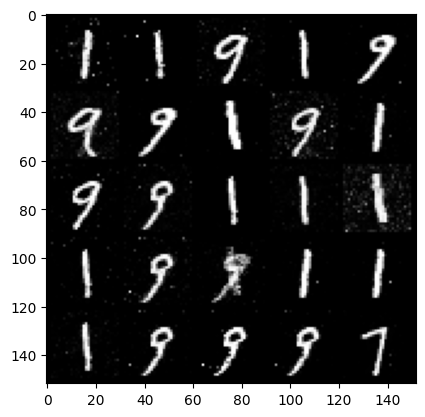

| Epoch: 060 | D_error: 0.477 | G_error: 2.721 | Time: 0m 33s


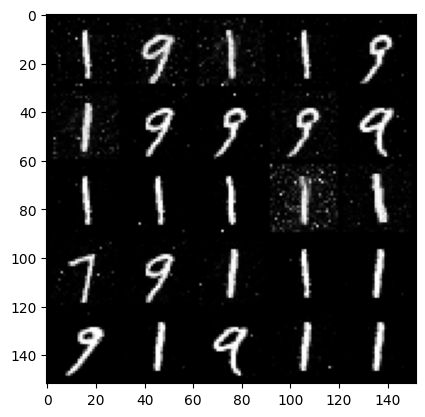

| Epoch: 065 | D_error: 0.424 | G_error: 2.460 | Time: 0m 32s


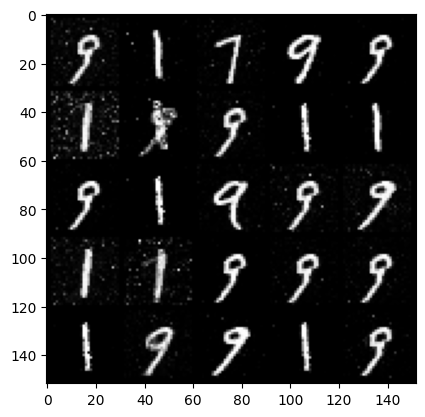

| Epoch: 070 | D_error: 0.388 | G_error: 2.516 | Time: 0m 34s


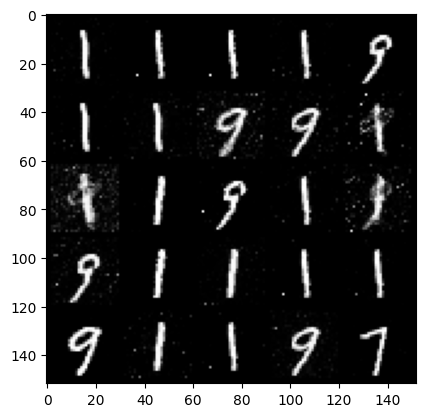

| Epoch: 075 | D_error: 0.402 | G_error: 2.785 | Time: 0m 34s


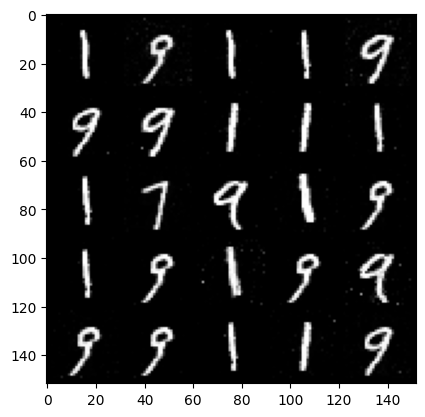

| Epoch: 080 | D_error: 0.426 | G_error: 2.451 | Time: 0m 33s


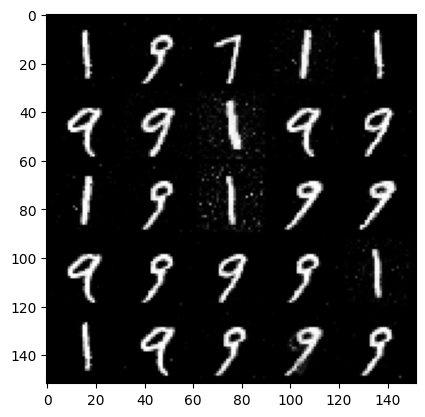

| Epoch: 085 | D_error: 0.455 | G_error: 2.283 | Time: 0m 34s


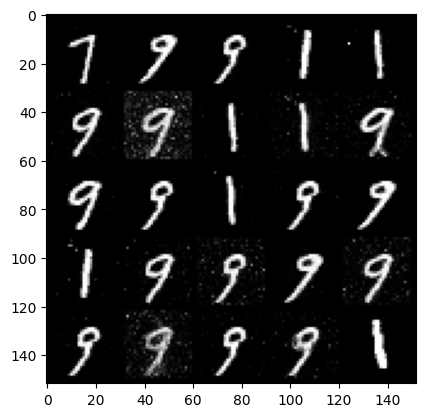

| Epoch: 090 | D_error: 0.384 | G_error: 2.764 | Time: 0m 34s


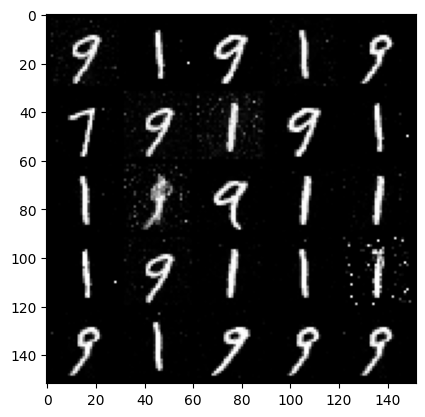

| Epoch: 095 | D_error: 0.364 | G_error: 2.281 | Time: 0m 32s


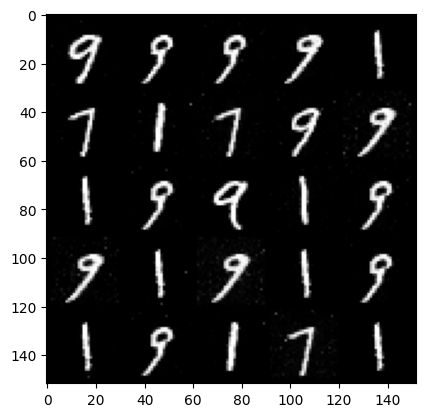

| Epoch: 100 | D_error: 0.403 | G_error: 2.681 | Time: 0m 33s


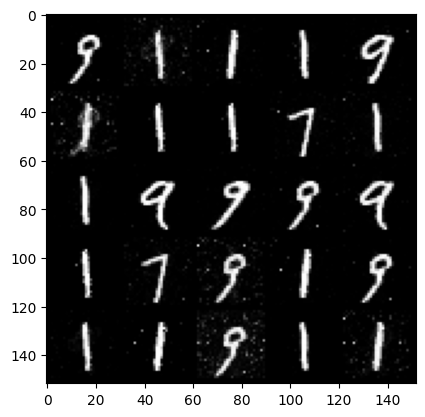

In [23]:
for epoch in range(1, n_epochs+1):

    start_time = time.time()

    for _ in range (len(iterator)):

        #=====================#
        # TRAIN DISCRIMINATOR #
        #=====================#

        #zero discriminator gradients
        D.zero_grad()

        #get batch of real images
        x, _ = next(iter(iterator))

        #place images on GPU
        x = x.to(device)

        #flatten images
        x = x.view(-1, image_size)

        #sample noise
        z = torch.randn(x.shape[0], latent_dim).to(device)

        #generate images
        with torch.no_grad():
            generated_images = G(z)

        #put real images through discriminator
        pred_real = D(x)

        #how well does the discriminator detect real images?
        D_error_real = criterion(pred_real, real_labels)

        #put fake images through the discriminator
        #need to detach so don't backpropagate through generator
        pred_fake = D(generated_images.detach())

        #how well does the discriminator detect fake images?
        D_error_fake = criterion(pred_fake, fake_labels)

        #get discriminator error
        D_error = D_error_real + D_error_fake

        #backpropagate errors to get gradients
        D_error.backward()

        #use gradient to update discriminator parameters
        D_optimizer.step()

        #=================#
        # TRAIN GENERATOR #
        #=================#

        #zero generator gradients
        G.zero_grad()

        #get batch of real images
        x, _ = next(iter(iterator))

        #place images on GPU
        x = x.to(device)

        #flatten images
        x = x.view(-1, image_size)

        #sample noise
        z = torch.randn(x.shape[0], latent_dim).to(device)

        #generate images
        generated_images = G(z)

        #put fake images through the discriminator
        pred_fake = D(generated_images)

        #how well does the generator fool the discriminator?
        G_error = criterion(pred_fake, real_labels)

        #backpropagate errors to get gradients
        G_error.backward()

        #use gradient to update generator parameters
        G_optimizer.step()

    end_time = time.time()

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)

    if (epoch % print_every) == 0:

        #sample noise
        z = torch.randn(n_show*n_show, latent_dim).to(device)

        #generate images
        with torch.no_grad():
            generated_images = G(z)

        #reshape to (batch, channel, height, width)
        generated_images = generated_images.view(-1, 1, 28, 28)

        print(f'| Epoch: {epoch:03} | D_error: {D_error.item():.03f} | G_error: {G_error.item():.03f} | Time: {epoch_mins}m {epoch_secs}s')

        #save N_SHOW*N_SHOW images
        torchvision.utils.save_image(generated_images,
                                     f'images/gan/epoch{epoch:03}.png',
                                     nrow=n_show,
                                     normalize=True)

        #display images
        img = plt.imread(f'images/gan/epoch{epoch:03}.png')
        plt.imshow(img)
        plt.show()

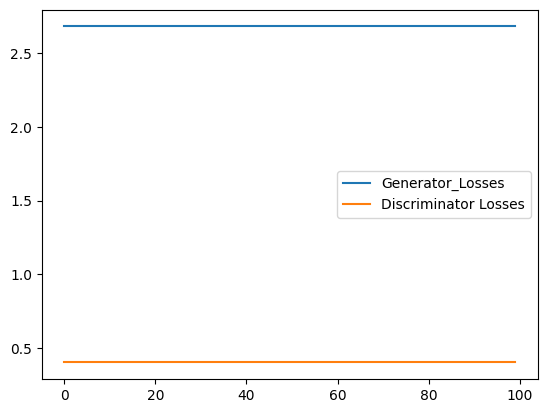

In [45]:
# Initialize empty lists to store losses
g_losses = []
d_losses = []

for epoch in range(1, n_epochs+1):
  g_losses.append(G_error.item())
  d_losses.append(D_error.item())
plt.plot(g_losses, label='Generator_Losses')
plt.plot(d_losses, label='Discriminator Losses')
plt.legend()
plt.savefig('loss.png')